# Importing Data

In [1]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data & Preliminary Look


In [22]:
df = pd.read_csv('/content/drive/MyDrive/churn.csv')

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**RowNumber**—corresponds to the record (row) number and has no effect on the output.

**CustomerId**—contains random values and has no effect on customer leaving the bank.

**Surname**—the surname of a customer has no impact on their decision to leave the bank.

**CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography**—a customer’s location can affect their decision to leave the bank.

**Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts**—refers to the number of products that a customer has purchased through the bank.

**HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember**—active customers are less likely to leave the bank.

**EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited**—whether or not the customer left the bank.

# Data Cleaning

In [25]:
# check missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
#check duplicated data
df.duplicated().sum()

0

the data is clear

# EDA

In [27]:
# Group columns by their types
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited']
cats = ['Geography', 'Gender']

In [28]:
# statistical summary numeric columns
df[nums].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
# statistical summary categoric columns
df[cats].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [30]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

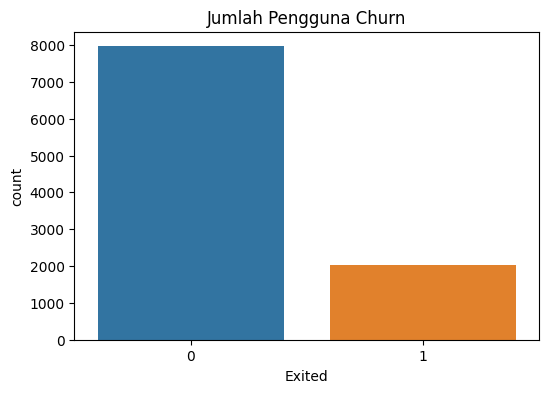

In [31]:
plt.figure(figsize=(6, 4))
plt.title('Jumlah Pengguna Churn')
sns.countplot(data=df, x=df['Exited'])

plt.show()

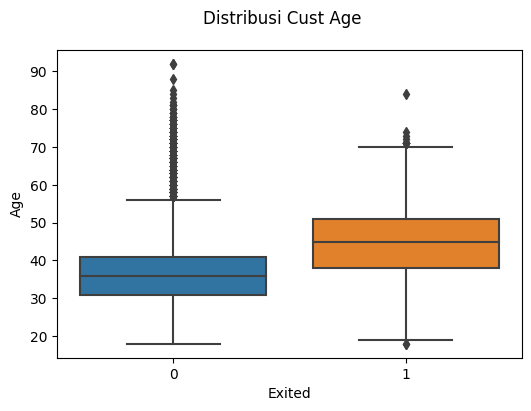

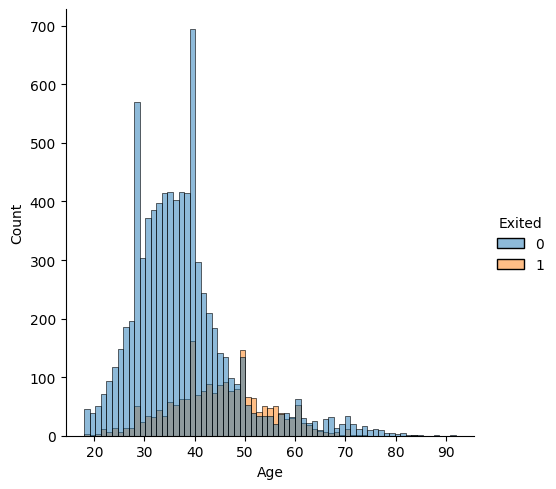

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi Cust Age')
sns.boxplot(x=df['Exited'], y=df['Age'])
sns.displot(x=df['Age'], hue=df['Exited'])
plt.show()

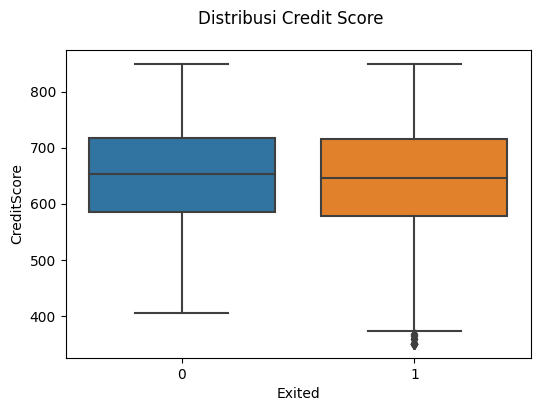

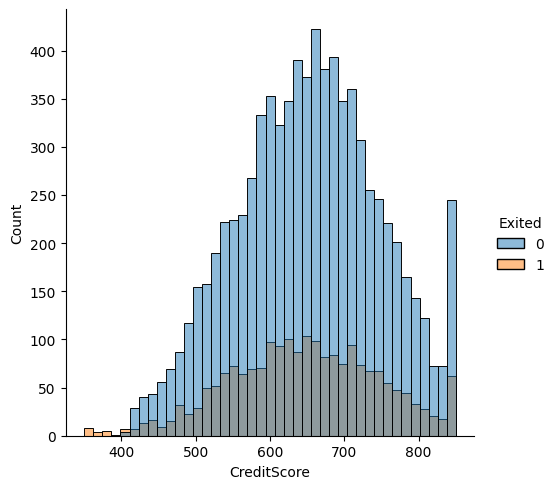

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi Credit Score')
sns.boxplot(x=df['Exited'], y=df['CreditScore'])
sns.displot(x=df['CreditScore'], hue=df['Exited'])
plt.show()

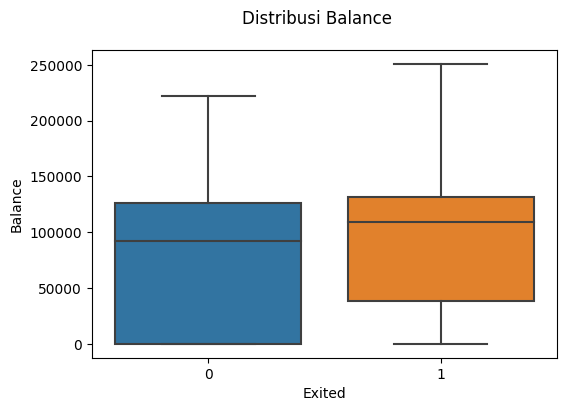

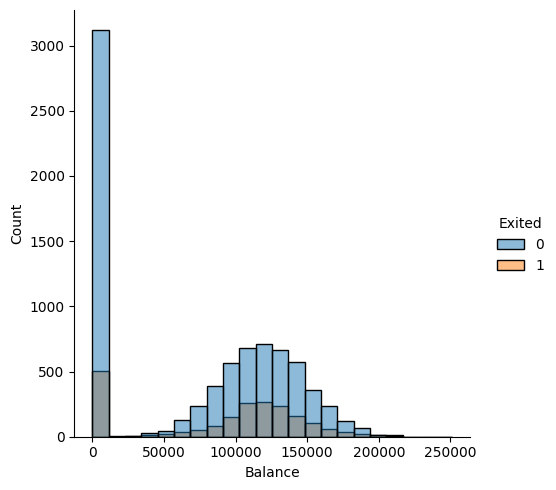

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi Balance')
sns.boxplot(x=df['Exited'], y=df['Balance'])
sns.displot(x=df['Balance'], hue=df['Exited'])
plt.show()

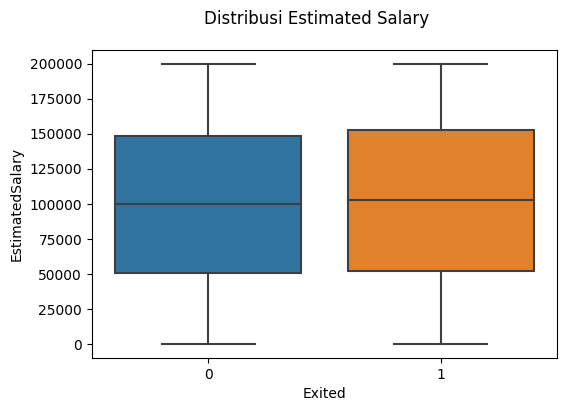

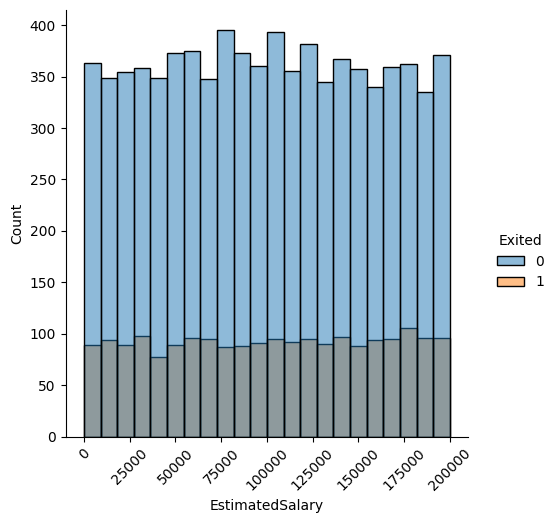

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi Estimated Salary')
sns.boxplot(x=df['Exited'], y=df['EstimatedSalary'])
sns.displot(x=df['EstimatedSalary'], hue=df['Exited'])
plt.xticks(rotation=45)

plt.show()

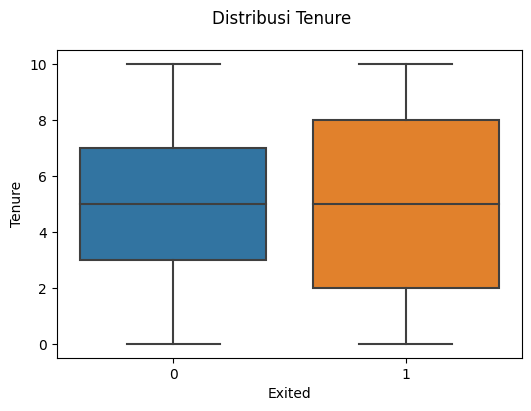

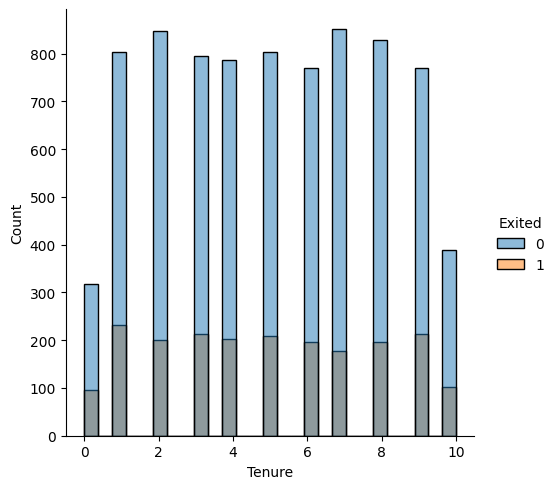

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi Tenure')
sns.boxplot(x=df['Exited'], y=df['Tenure'])
sns.displot(x=df['Tenure'], hue=df['Exited'])
plt.show()

In [37]:
# make a copy dataset
df_copied = df.copy()

In [42]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  group_tenure     10000 non-null  object 
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ MB


In [40]:
# grouping tenure
def group_tenure(x) :
  if x <= 1 :
    return 'New'
  elif x > 1 and x < 4 :
    return 'Mid-term'
  else :
    return 'Long-term'

In [41]:
df_copied['group_tenure'] = df_copied['Tenure'].apply(group_tenure)

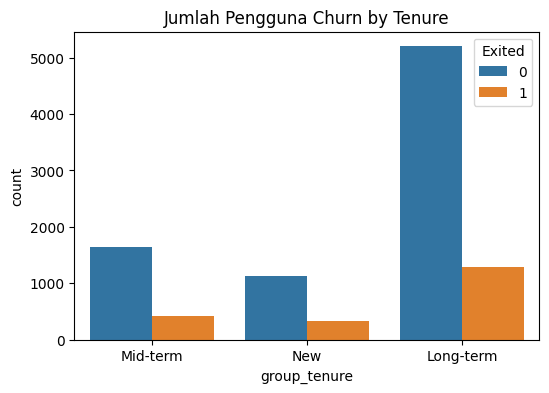

In [44]:
plt.figure(figsize=(6, 4))
plt.title('Jumlah Pengguna Churn by Tenure')
sns.countplot(data=df_copied, x=df_copied['group_tenure'], hue=df_copied['Exited'])

plt.show()

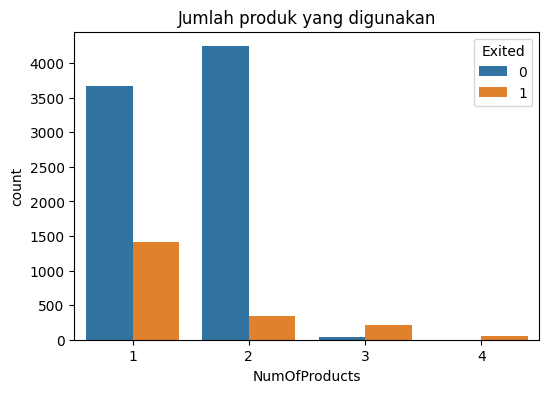

In [46]:
plt.figure(figsize=(6, 4))
plt.title('Jumlah produk yang digunakan')
sns.countplot(data=df, x=df['NumOfProducts'], hue=df['Exited'])

plt.show()

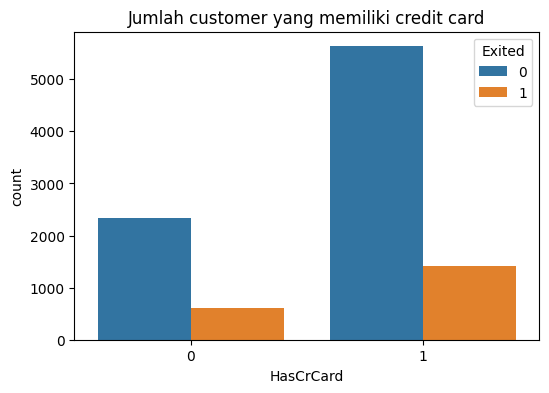

In [47]:
plt.figure(figsize=(6, 4))
plt.title('Jumlah customer yang memiliki credit card')
sns.countplot(data=df, x=df['HasCrCard'], hue=df['Exited'])

plt.show()

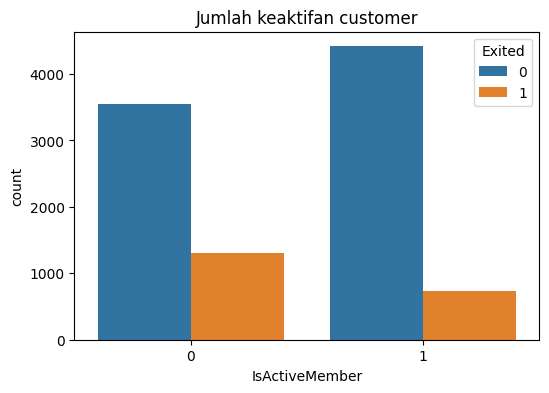

In [48]:
plt.figure(figsize=(6, 4))
plt.title('Jumlah keaktifan customer')
sns.countplot(data=df, x=df['IsActiveMember'], hue=df['Exited'])

plt.show()

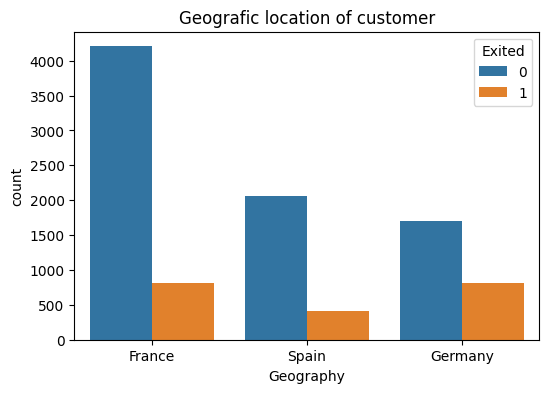

In [50]:
plt.figure(figsize=(6, 4))
plt.title('Geografic location of customer')
sns.countplot(data=df, x=df['Geography'], hue=df['Exited'])

plt.show()

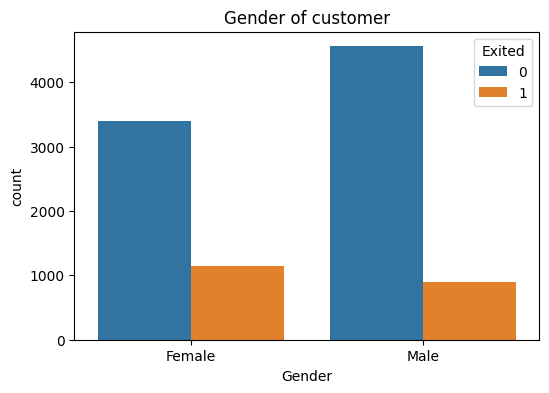

In [51]:
plt.figure(figsize=(6, 4))
plt.title('Gender of customer')
sns.countplot(data=df, x=df['Gender'], hue=df['Exited'])

plt.show()

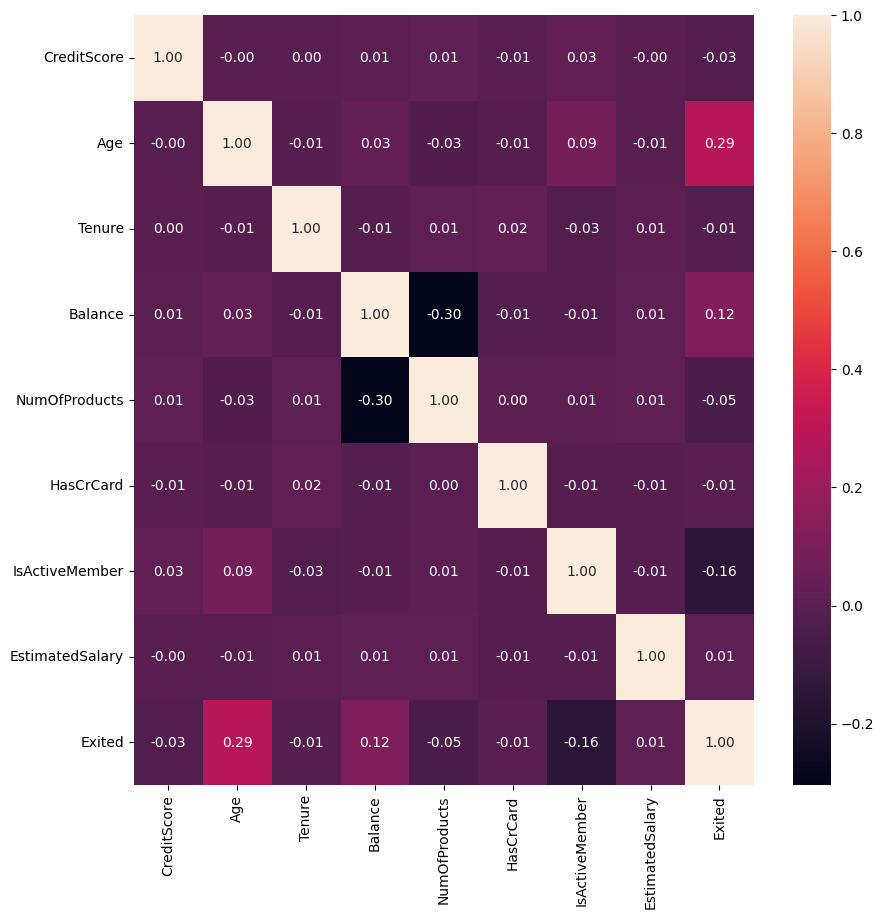

In [52]:
correlation = df[nums].corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

# Data Preprocessing

In [53]:
# Drop columns that do not affect the dependent variable
df_prepared = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# Encoding categorical variables which type are string
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df_prepared['Gender'])
df_prepared['Gender'] = label_encoder.transform(df_prepared['Gender'])

label_encoder.fit(df_prepared['Geography'])
df_prepared['Geography'] = label_encoder.transform(df_prepared['Geography'])

df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [55]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
df_prepared[nums] = mmscaler.fit_transform(df_prepared[nums])
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,2,0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0,0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0,0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,2,0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [56]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df_prepared.drop("Exited", axis=1)
y = df_prepared["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelling

In [57]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Models Evaluation

performa logreg:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1600
         1.0       0.53      0.15      0.24       400

    accuracy                           0.80      2000
   macro avg       0.67      0.56      0.56      2000
weighted avg       0.76      0.80      0.76      2000



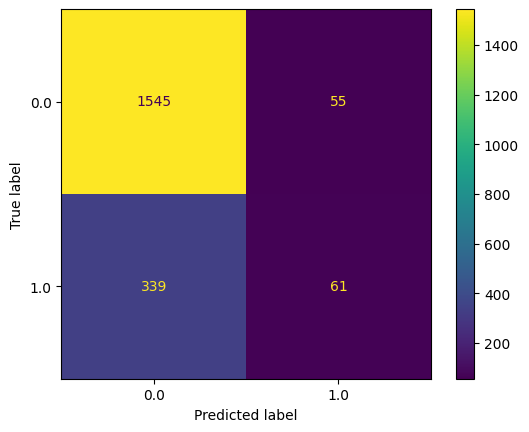


performa dtc:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1600
         1.0       0.45      0.48      0.47       400

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.78      0.78      0.78      2000



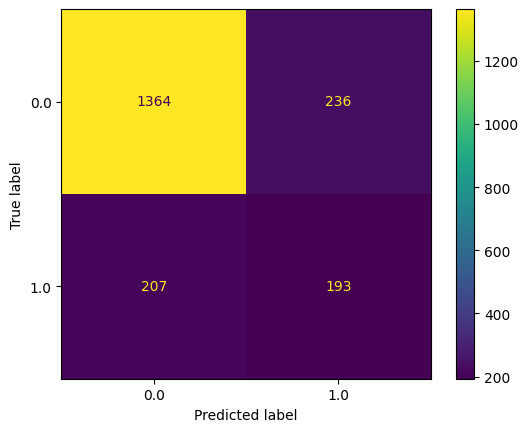


performa rfc:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1600
         1.0       0.76      0.45      0.57       400

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



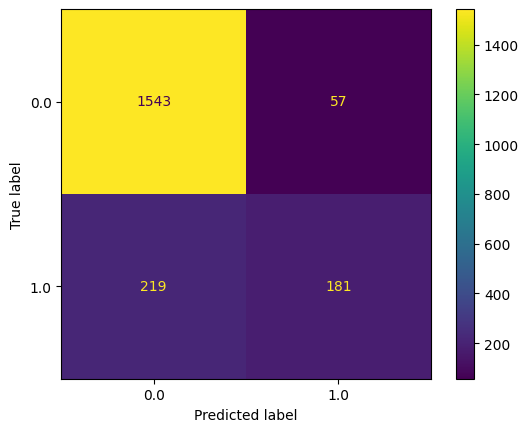

In [28]:
# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluating the model with Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

models = [logreg, dtc, rfc]
str_model = ['logreg', 'dtc', 'rfc']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  cm = confusion_matrix(y_test, prediction,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  print(f'performa {str_mod}:')
  #print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  disp.plot()
  plt.show()
  print()

# Imbalance Data Handling

In [29]:
from imblearn import under_sampling, over_sampling

# imbalance data handling menggunakan SMOTE
smote = over_sampling.SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X,y)

print(f'''shape of X before SMOTE:{X.shape}
shape of X after SMOTE:{X_smote.shape}''')

print('\nbalance of positive & negative classes (%):')
y_smote.value_counts(normalize=True)*100

shape of X before SMOTE:(10000, 10)
shape of X after SMOTE:(15926, 10)

balance of positive & negative classes (%):


1.0    50.0
0.0    50.0
Name: Exited, dtype: float64

# Modelling With Imbalance Data Handling

In [30]:
X_train_smote, X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote, y_smote,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [31]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

dtc_smote = DecisionTreeClassifier(random_state=42)
dtc_smote.fit(X_train_smote, y_train_smote)

rfc_smote = RandomForestClassifier(random_state=42)
rfc_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

# Models Evaluation

performa logreg:
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.79      1600
         1.0       0.36      0.66      0.46       400

    accuracy                           0.69      2000
   macro avg       0.62      0.68      0.62      2000
weighted avg       0.78      0.69      0.72      2000



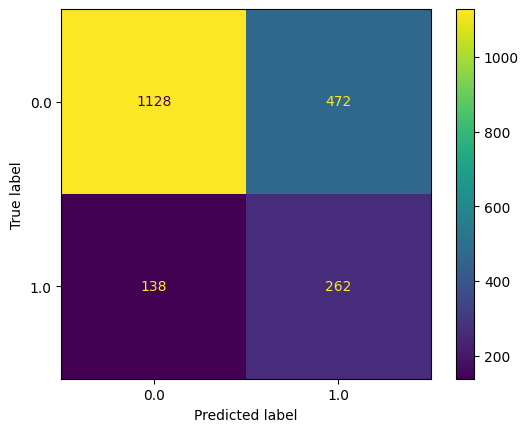


performa dtc:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1600
         1.0       0.89      0.92      0.91       400

    accuracy                           0.96      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.96      0.96      0.96      2000



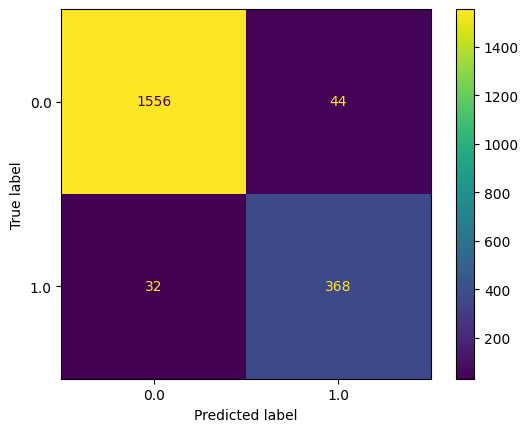


performa rfc:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1600
         1.0       0.91      0.95      0.93       400

    accuracy                           0.97      2000
   macro avg       0.95      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000



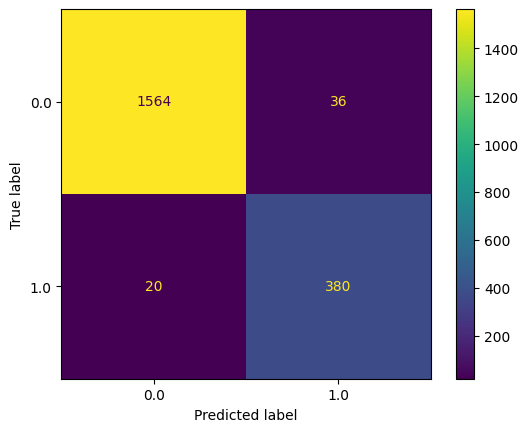

In [32]:
models = [logreg_smote, dtc_smote, rfc_smote]
str_model = ['logreg', 'dtc', 'rfc']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  cm = confusion_matrix(y_test, prediction,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  print(f'performa {str_mod}:')
  #print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  disp.plot()
  plt.show()
  print()

# Models Validation

In [34]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10,shuffle=True,
                              random_state=42)

In [40]:
for model,str_mod in zip(models, str_model):
  result = model_selection.cross_val_score(model, X_smote, y_smote, cv=kfold,
                                           scoring='recall')
  print(f'Model {str_mod}:')
  print('recall :%.2f%% (%.2f%%)' % (result.mean()*100, result.std()*100))

Model logreg:
recall :70.23% (1.47%)
Model dtc:
recall :85.61% (0.95%)
Model rfc:
recall :90.23% (0.65%)


# Features Importance

In [51]:
importances = rfc_smote.feature_importances_

In [52]:
features = pd.DataFrame({'feature': X_train_smote.columns, 'importance': importances})

In [53]:
features = features.sort_values(by='importance', ascending=True)
features

,feature,importance
7,HasCrCard,0.015881
2,Gender,0.019544
8,IsActiveMember,0.033199
1,Geography,0.033214
4,Tenure,0.088674
0,CreditScore,0.102388
9,EstimatedSalary,0.106340
5,Balance,0.124949
6,NumOfProducts,0.185157
3,Age,0.290654


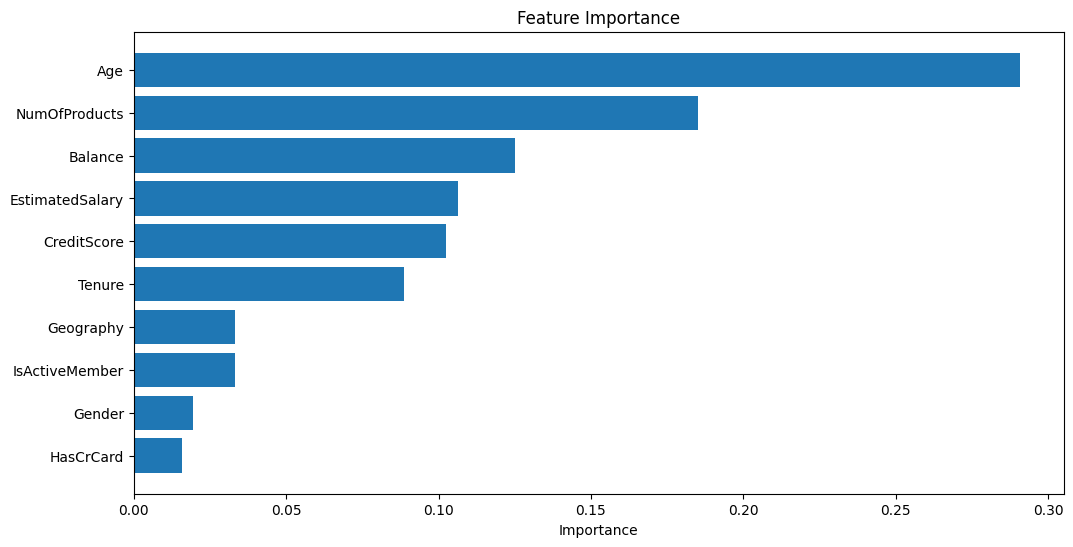

In [54]:
plt.subplots(figsize=(12,6))

plt.barh(features['feature'], features['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()